In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

#Sample dataset
data = {'values': [5, 10, 15, 20, 25, 30, 35] }
df = pd.DataFrame(data)

In [2]:
#1. Identifying outliers using IOR
Q1 =df['values'].quantile(0.25)
Q3 =df['values'].quantile(0.75) 
IQR=Q3 - Q1

#Thresholds
lowerbound =Q1-1.5* IQR 
upperbound = Q3+1.5 * IQR

#Mark outliers
df['Outlier_IQR'] =(df['values']< lowerbound) | (df['values'] > upperbound)


In [3]:
#2. Identifying outliers using Z-Score 
df['Z-Score'] = zscore(df['values'])
df[ 'Outlier_Z'] = df['Z-Score'].abs() > 3
print("Dataset with Outliers Flagged:")
print(df)

Dataset with Outliers Flagged:
   values  Outlier_IQR  Z-Score  Outlier_Z
0       5        False     -1.5      False
1      10        False     -1.0      False
2      15        False     -0.5      False
3      20        False      0.0      False
4      25        False      0.5      False
5      30        False      1.0      False
6      35        False      1.5      False


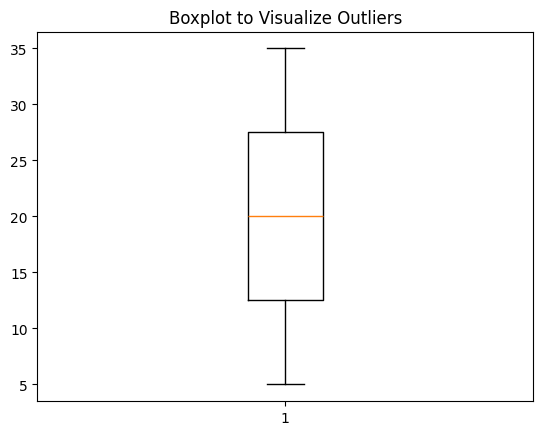

In [4]:
#Visualizing outliers
plt.boxplot(df['values'])
plt.title("Boxplot to Visualize Outliers")
plt.show()

In [5]:
#Handling outliers (removal)
cleaned_df=df[~df['Outlier_IQR']] # Remove IQR outliers
print("Dataset after Removing Outliers:")
print(cleaned_df)

Dataset after Removing Outliers:
   values  Outlier_IQR  Z-Score  Outlier_Z
0       5        False     -1.5      False
1      10        False     -1.0      False
2      15        False     -0.5      False
3      20        False      0.0      False
4      25        False      0.5      False
5      30        False      1.0      False
6      35        False      1.5      False


In [6]:
# Statistical measures before removing outliers
stats_before = df['values'].describe()

# Statistical measures after removing outliers
stats_after= cleaned_df['values'].describe()

print("Statistical Measures Before Removing Outliers:")
print(stats_before)

Statistical Measures Before Removing Outliers:
count     7.000000
mean     20.000000
std      10.801234
min       5.000000
25%      12.500000
50%      20.000000
75%      27.500000
max      35.000000
Name: values, dtype: float64


In [7]:
print("Statistical Measures After Removing Outliers:")
print(stats_after)

Statistical Measures After Removing Outliers:
count     7.000000
mean     20.000000
std      10.801234
min       5.000000
25%      12.500000
50%      20.000000
75%      27.500000
max      35.000000
Name: values, dtype: float64
